# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset under investigation is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Various characteristics about the patient are included such as Gender, Age and Neighborhood and if the patient is enrolled in Brasilian welfare program Bolsa Família as well as each individual's primary health designation(s) such as Hypertension, Alcoholism, and Diabetes. Six months of appointment data are assessed below.


Questions to be investigated:
* What is the proportion of appointment shows vs no shows?
* What is the patient age distribution of no-shows vs shows?
* What is the patient health designation breakdown of no-shows vs shows?
* Which neighborhoods have the highest number of no-shows?
* What is the breakdown of no-shows vs shows by patients that received SMS reminders?
* Do no-shows have a larger timeframe between schedule date and appointment date?
* Are there more no-shows on some days of the week?

<a id='wrangling'></a>
## Data Wrangling

#### Step 1: Import packages

 - Pandas.
 - Numpy.
 - datetime.
 - Matplotlib.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2: Load data into the Jupyter notebook

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Step 3: Integrity check to see if there is any naming or data type inconsistency in the dataset

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Changes Needed**: 
 - Changing column case and using underscores will make columns easier to read and work with
 - Changing column mispellings will make columns easier to read and work with

#### Step 4: Integrity check to see if there is any NULL data or data type inconsistency in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum().sum()

0

> **Changes Needed**: 
 - Changing patientID data type from float to int will make the dataset easier to work with
 - Stripping time from the schedule_day column will make the dataset easier to work with
 - Stripping time from the appointment_day column will make the dataset easier to work with

#### Step 5: Integrity check to see if there is any duplicate data in the dataset

In [6]:
sum(df.duplicated())

0

> **Changes Needed**: 
 - No duplicate data exists.

#### Step 6: Integrity check to count the number of unique patient and appointment IDs in the dataset

In [7]:
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

> **Changes Needed**: 
 - The results confirm that there are as many unique AppointmentIDs as there are rows. There are also less PatientIds than records, confirming that at least some values are reused. Because the AppointmentIDs are unique to each row it will be set as the dataframe index.

#### Step 7: Integrity check to see if there is any "bad" data in the dataset, i.e. data entry issues

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Changes Needed**:
 - Minimum Age appears as -1. Any such patient will be assumed to be a newborn or infant.

<a id='cleaning'></a>
## Data Cleaning

#### Step 1: Fixed column mispellings, incorporated underscores, and changed case

In [9]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### Step 2: Changed schedule_day and appointment_day column to datetime

In [10]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientID        110527 non-null  float64            
 1   appointmentID    110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   schedule_day     110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighborhood     110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

#### Step 3: Stripped time from schedule_day and appointment_day since it has no time-level data
- Ignoring the time portion of schedule_day because no time data exists
- Ignoring the time portion of appointment_day to keep value uniform with schedule_day

In [11]:
df['schedule_day'] = df['schedule_day'].apply(lambda x: x.strftime('%m-%d-%Y'))
df['appointment_day'] = df['appointment_day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientID        110527 non-null  float64
 1   appointmentID    110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   schedule_day     110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighborhood     110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Step 4: Created a schedule_dayOfWeek and appointment_dayOfWeek column for day of week analysis

In [12]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

df['schedule_dayOfWeek'] = df['schedule_day'].dt.strftime("%A")
df['appointment_dayOfWeek'] = df['appointment_day'].dt.strftime("%A")
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dayOfWeek,appointment_dayOfWeek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


#### Step 5: Changed patiendID data type from float to int

In [13]:
df['patientID'] = df['patientID'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   patientID              110527 non-null  int64         
 1   appointmentID          110527 non-null  int64         
 2   gender                 110527 non-null  object        
 3   schedule_day           110527 non-null  datetime64[ns]
 4   appointment_day        110527 non-null  datetime64[ns]
 5   age                    110527 non-null  int64         
 6   neighborhood           110527 non-null  object        
 7   scholarship            110527 non-null  int64         
 8   hypertension           110527 non-null  int64         
 9   diabetes               110527 non-null  int64         
 10  alcoholism             110527 non-null  int64         
 11  handicap               110527 non-null  int64         
 12  sms_received           110527 non-null  int6

#### Step 6: Transformed the data type of the no_show field to integer

In [14]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df["no_show"] = df['no_show'].astype(np.int64)
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dayOfWeek,appointment_dayOfWeek
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   patientID              110527 non-null  int64         
 1   appointmentID          110527 non-null  int64         
 2   gender                 110527 non-null  object        
 3   schedule_day           110527 non-null  datetime64[ns]
 4   appointment_day        110527 non-null  datetime64[ns]
 5   age                    110527 non-null  int64         
 6   neighborhood           110527 non-null  object        
 7   scholarship            110527 non-null  int64         
 8   hypertension           110527 non-null  int64         
 9   diabetes               110527 non-null  int64         
 10  alcoholism             110527 non-null  int64         
 11  handicap               110527 non-null  int64         
 12  sms_received           110527 non-null  int6

#### Step 7: Drop rows where have age under 0 year

In [16]:
df.query('age < 0')

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dayOfWeek,appointment_dayOfWeek
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,Monday,Monday


In [17]:
df = df[df.age >= 0]

### Dataframes for reuse throughout analyses

#### Dataframe 1: Created a new column to store time between scheduling and appointment

In [18]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']

#### Dataframe 2: Created a dataframe to hold all no-show records

In [19]:
no_shows = df.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_noshow = days / np.timedelta64(1, 'D')

#### Dataframe 3: Created a dataframe to hold all show records

In [20]:
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')
no_shows.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dayOfWeek,appointment_dayOfWeek,elapsed_days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,Tuesday,Friday,3 days
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,Thursday,Friday,1 days
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,Wednesday,Friday,2 days


<a id='eda'></a>
## Exploratory Data Analysis

### Tables and Plots to Summarize

#### Question 1: What is the proportion of appointment shows vs no shows?

In [21]:
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"
noshows_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
new_df['proportion'] = [noshows_prop, shows_prop]
new_df.head()

,status,total,proportion
0,No Show,88207,0.798066
1,Show,22319,0.201934


> **Figure:** Proportion of shows and no-shows

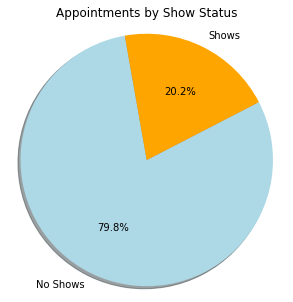

In [22]:
# Data to plot
labels = ['No Shows', 'Shows']
sizes = [noshows_prop, shows_prop]
colors = ['lightblue', 'orange']

# The plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Appointments by Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of appointment show status.
The most of patients no show and only 20% whom shows

#### Question 2: What is the patient age distribution of no-shows vs shows?

In [23]:
age_df_noshows = no_shows['age'].mean()
age_df_shows = shows['age'].mean()
print('mean of no-shows patient age:\t{}\nmean of shows patient age:\t{}'.format(age_df_noshows,age_df_shows))

mean of no-shows patient age:	34.31766656212196
mean of shows patient age:	37.790504154999034


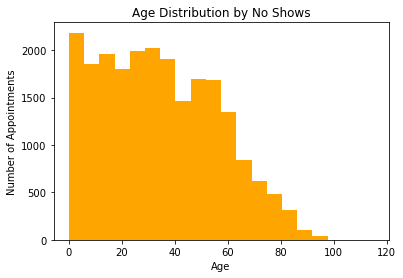

In [24]:
# Data to plot
age_df_noshows = no_shows['age']
age_df_shows = shows['age']
# The plot
plt.hist(age_df_noshows, stacked=True, bins=20, color='orange')
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> Visual distribution of age for all no-shows
This clearly show the highest value in the scale of the new born

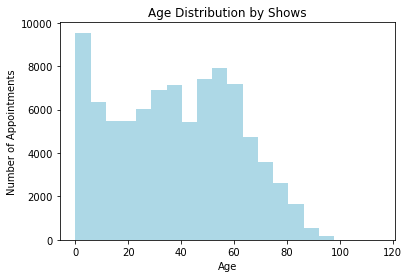

In [25]:
# The plot
plt.hist(age_df_shows, stacked=True, bins=20, color='lightblue')
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> Visual distribution of age for all shows.
This clearly show the highest value in the scale of the new born

#### Question 3: What is the patient health designation breakdown of no-shows vs shows?

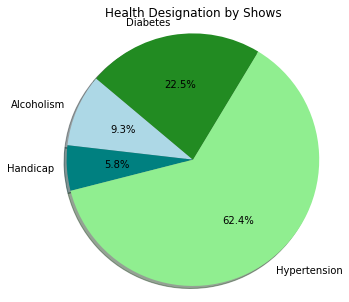

In [26]:
# Total No-Shows
nos_by_health = no_shows.loc[(no_shows.alcoholism == 1) & (no_shows.handicap == 1) & (no_shows.hypertension == 1) & (no_shows.diabetes == 1)]
total_nos = nos_by_health.shape[0]
# Total Shows
shows_by_health = shows.loc[(shows.alcoholism == 1) & (shows.handicap == 1) & (shows.hypertension == 1) & (shows.diabetes == 1)]
total_shows = shows_by_health.shape[0]
# Total Alcoholism
df_alc2 = shows.query('alcoholism == "1"')
dfa2 = df_alc2.shape[0]
# Proportion Alcoholism
a2 = float(dfa2 / total_shows)
# Total Handicap
df_han2 = shows.query('handicap == "1"')
dfb2 = df_han2.shape[0]
# Proportion Handicap
b2 = float(dfb2 / total_shows)
# Total Hypertension
df_hyp2 = shows.query('hypertension == "1"')
dfc2 = df_hyp2.shape[0]
# Proportion Hypertension
c2 = float(dfc2 / total_shows)
# Total Diabetes
df_dia2 = shows.query('diabetes == "1"')
dfd2 = df_dia2.shape[0]
# Proportion Diabetes
d2 = float(dfd2 / total_shows)
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a2, b2, c2, d2]
colors = ['lightblue', 'teal', 'lightgreen', 'forestgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Health Designation by Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of health designations for all shows.
This clearly show the the largest category is Hypertension

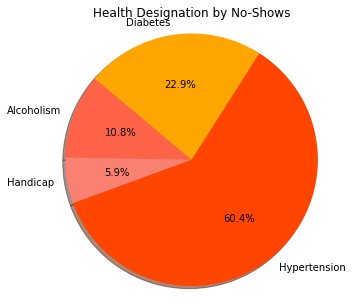

In [27]:
# Total Alcoholism
df_alc = no_shows.query('alcoholism == "1"')
dfa = df_alc.shape[0]
# Proportion Alcoholism
a = float(dfa / total_nos)
# Total Handicap
df_han = no_shows.query('handicap == "1"')
dfb = df_han.shape[0]
# Proportion Handicap
b = float(dfb / total_nos)
# Total Hypertension
df_hyp = no_shows.query('hypertension == "1"')
dfc = df_hyp.shape[0]
# Proportion Hypertension
c = float(dfc / total_nos)
# Total Diabetes
df_dia = no_shows.query('diabetes == "1"')
dfd = df_dia.shape[0]
# Proportion Diabetes
d = float(dfd / total_nos)
# The plot
labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a, b, c, d]
colors = ['tomato', 'salmon', 'orangered', 'orange']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',  shadow=True, startangle=140)
plt.title('Health Designation by No-Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> Visual distribution of health designations for all no-shows.
This clearly show the the largest category is Hypertension

#### Question 4: Which neighborhoods have the highest number of no-shows?

In [28]:
shows_by_neighbor = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_neighbor.head(5)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


> Top 5 neighborhoods by shows

In [29]:
noshows_by_neighbor = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
noshows_by_neighbor.head(5)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703


> Top 5 neighborhoods by no-shows

#### Question 5: What is the breakdown of no-shows vs shows by patients that received SMS reminders?

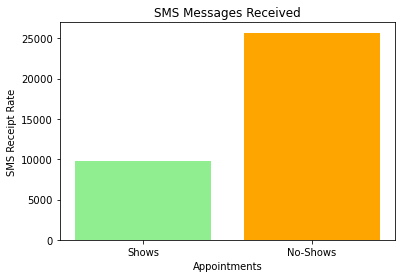

In [30]:
# Data to plot
noshows_sms_count = no_shows.query('sms_received == 1')
a = noshows_sms_count.shape[0]
shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

# The plot
locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']
colors=['lightgreen','orange']
bar1 = plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('SMS Messages Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Receipt Rate');

> Visual distribution of appointment status when reminder messages are received

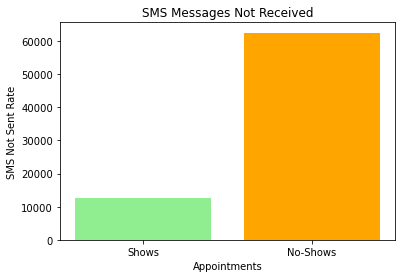

In [31]:
# Data to plot
noshows_sms_count = no_shows.query('sms_received == 0')
no = noshows_sms_count.shape[0]
shows_sms_count = shows.query('sms_received == 0')
yes = shows_sms_count.shape[0]

# The plot
locations = [1, 2]
heights = [no, yes]
labels = ['Shows', 'No-Shows']
colors = ['lightgreen','orange']
bar2 = plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('SMS Messages Not Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Not Sent Rate');

> Visual distribution of appointment status when reminder messages are not received

#### Question 6: Do no-shows have a larger timeframe between schedule date and appointment date?

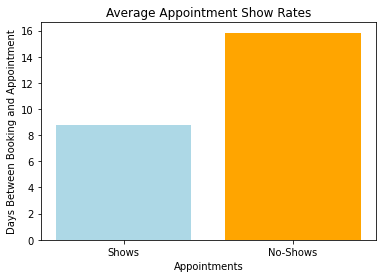

In [32]:
# The plot
locations = [1, 2]
heights = [timeframe_shows, timeframe_noshow]
labels = ['Shows', 'No-Shows']
colors=['lightblue','orange']
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('Average Appointment Show Rates')
plt.xlabel('Appointments')
plt.ylabel('Days Between Booking and Appointment');

> Visual distribution of mean timeframe between scheduling and appointment time

#### Question 7: Are there more no-shows on some days of the week?

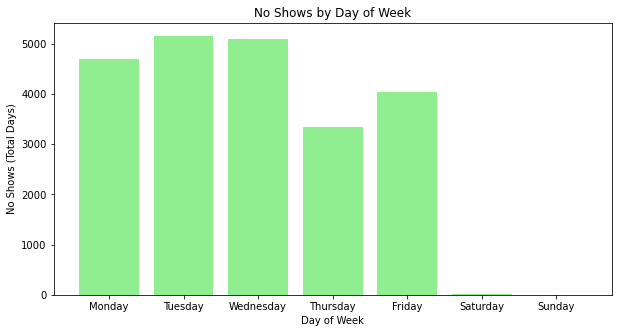

In [33]:
# Data to plot
nos_mon = no_shows.query('appointment_dayOfWeek == "Monday"')
nos_mon = nos_mon['appointment_dayOfWeek'].count()
nos_tue = no_shows.query('appointment_dayOfWeek == "Tuesday"')
nos_tue = nos_tue['appointment_dayOfWeek'].count()
nos_wed = no_shows.query('appointment_dayOfWeek == "Wednesday"')
nos_wed = nos_wed['appointment_dayOfWeek'].count()
nos_thu = no_shows.query('appointment_dayOfWeek == "Thursday"')
nos_thu = nos_thu['appointment_dayOfWeek'].count()
nos_fri = no_shows.query('appointment_dayOfWeek == "Friday"')
nos_fri = nos_fri['appointment_dayOfWeek'].count()
nos_sat = no_shows.query('appointment_dayOfWeek == "Saturday"')
nos_sat = nos_sat['appointment_dayOfWeek'].count()
nos_sun = no_shows.query('appointment_dayOfWeek == "Sunday"')
nos_sun = nos_sun['appointment_dayOfWeek'].count()

# The plot
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='lightgreen')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')
fig = plt.gcf()
fig.set_size_inches(10,5);

> Visual distribution of no-shows by day of week

<a id='conclusions'></a>
## Conclusions

#### Results:

_1. What is the proportion of appointment shows vs no shows?_
* More than 79.8% of all appointments investigated were no-shows (Total: 88,207).And only 20.2% of all appointments investigated were shows (Total: 22,319).

_2. What is the patient age distribution of no-shows vs shows?_
* There isn't big difference between the no-shows and shows patient ages.The mean age of the no-shows segment was 34 while the shows segment which was 38.

_3. What is the patient health designation breakdown of no-shows vs shows?_
* Hypertension was the largest category in both segments (no-shows and shows patient) due to the popularity of the designation.But there isn't any common between patient health designation breakdown and shows or no-shows.

_4. Which neighborhoods have the highest number of no-shows?_
* JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows. This is likely due to the population of these neighbhorhoods.

_5. What is the breakdown of no-shows vs shows by patients that received SMS reminders?_
* The proportion of no-shows was nearly double when an SMS message wasn't sent to the patient before their appointment day. There is a correlation between SMS messaging and appointment show rate.

_6. Do no-shows have a larger timeframe between schedule date and appointment date?_
* The mean timeframe between schedule date and appointment date for no-shows was higher than shows. The show rate was better if the appointment was booked fewer days from the appointment date. There is a correlation between the number of days out and appointment show rate.

_7. Are there more no-shows on some days of the week?_
* Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate.

#### Limitations:

* The analyzed data set is abbreviated to 6 months data only. Therefore, the availability of data with a longer time frame will provide a more accurate view to take into account the effects of seasonal and official holidays on show rates.

* If patients with frequent no-shows were excluded, it would be better to understand the environmental or health factors that influence no-attendance. This is not done, but it could improve the accuracy and integrity of the analysis

* Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.

## Resources

Markdown
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis

General Pyplot Visualization
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Pie Chart Parameters
https://pythonspot.com/en/matplotlib-pie-chart/

Bar Chart Colors
https://htmlcolorcodes.com/color-names/
